# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read file using pandas.

# View sample data

In [2]:
# Your code to read the dataset
df = pd.read_csv('hazelnut.csv')
df.head()
# Your code to Print sample dataset

,sample_id,length,width,thickness,surface_area,mass,compactness,hardness,shell_top_radius,water_content,carbohydrate_content,variety
0,71,11.67,12.8025,8.055075,34.65,1375.50,0.93005,19.145,4.4604,0.048668,0.175,c_avellana
1,72,13.86,13.0995,7.349907,38.10,1439.55,0.93401,8.780,4.7844,0.048826,0.167,c_avellana
2,1,20.53,15.5925,9.565427,49.89,1623.30,0.96217,5.120,5.2893,0.049521,0.174,c_americana
3,73,14.13,12.2220,7.182949,35.43,1412.25,0.90178,13.694,4.8168,0.049595,0.167,c_avellana
4,2,15.85,14.7240,8.622661,43.29,1512.00,0.96261,10.925,4.6296,0.050384,0.173,c_americana


# Print the shape of the pandas dataframe

In [3]:
# Print the shape of the dataframe
df.shape

(201, 12)

# Separate the dataframe into input matrix X and output vector y

In [4]:
X = df.drop('variety',axis=1).values
y = df['variety'].values

# Import the SKlearn methods

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score


# Split the data into train and test sets - X_train, X_test, y_train, y_test.

# Use test size of 40%.

## Hint: Use Sklearn function: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [6]:
# Your code to separate train and test sixe.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# Your code to Print the shapes of the X_train, X_test, y_train, y_test
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(120, 11)
(81, 11)
(120,)
(81,)


# Scale the dataset between 0-1.

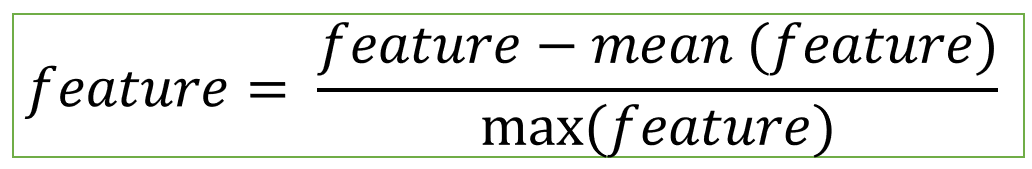

In [7]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Implement Knn classifer using sklearn.

# Use number of neigbours as 3.

In [8]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Make predictions on the test sample X_test.

# Print predicted values.

# Print actual test values.

# Are predicted and actual values are equal?

In [9]:
y_pred = knn.predict(X_test)
print (y_pred)
print (y_test)

['c_avellana' 'c_americana' 'c_americana' 'c_avellana' 'c_cornuta'
 'c_avellana' 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana'
 'c_avellana' 'c_cornuta' 'c_cornuta' 'c_avellana' 'c_americana'
 'c_americana' 'c_americana' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_cornuta' 'c_americana' 'c_cornuta' 'c_americana' 'c_cornuta'
 'c_americana' 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana'
 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana' 'c_avellana'
 'c_americana' 'c_avellana' 'c_cornuta' 'c_americana' 'c_cornuta'
 'c_americana' 'c_americana' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_avellana' 'c_avellana' 'c_cornuta' 'c_cornuta' 'c_cornuta'
 'c_americana' 'c_cornuta' 'c_cornuta' 'c_americana' 'c_avellana'
 'c_cornuta' 'c_avellana' 'c_americana' 'c_cornuta' 'c_americana'
 'c_cornuta' 'c_americana' 'c_avellana' 'c_avellana' 'c_americana'
 'c_americana' 'c_cornuta' 'c_americana' 'c_avellana' 'c_avellana'
 'c_avellana' 'c_americana' 'c_avellana' 'c_avellana' 'c_avellana'
 'c

# Print accuracy for training and test set.

In [10]:
print (knn.score(X_train, y_train))
print (knn.score(X_test, y_test))

0.9833333333333333
0.9506172839506173


# Print Classification report - Precision, Recall, and F-score.

In [11]:
print (classification_report(y_test, y_pred))

print (print("Validation Accuracy: ", accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

 c_americana       0.90      1.00      0.95        27
  c_avellana       0.96      0.93      0.94        27
   c_cornuta       1.00      0.93      0.96        27

    accuracy                           0.95        81
   macro avg       0.95      0.95      0.95        81
weighted avg       0.95      0.95      0.95        81

Validation Accuracy:  0.9506172839506173
None


# Display Confusion Matrix

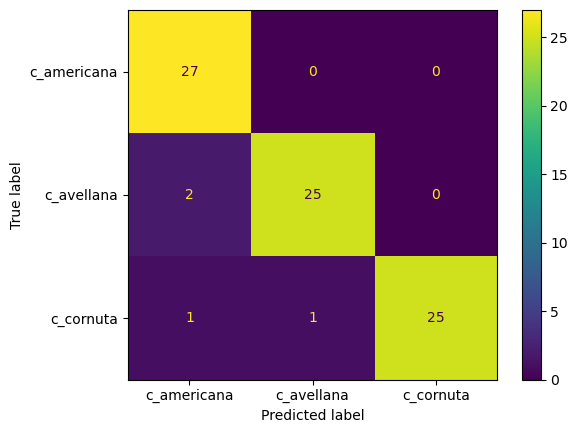

In [12]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)
disp.plot()
plt.show()

# Till now, we implemented the KNN for number of neigbours 3.
# Now, we will check the accuracy for number of neighbours 1- 10 - all values, and will plot accuracy.

In [14]:

# Your code to create an empty list train_scores
train_scores = []
# Your code to create an empty list test_scores
test_scores = []
# Your code to create a list neighbours having values [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]. 
neighbours = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
#You can create numpy array and use np.arange function.

In [15]:
for neigbour in neighbours :
    knn = KNeighborsClassifier(n_neighbors= neigbour)
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
   
    
  # Make predictions on train data.  Store the values in train_pred variable.
  # Make predictions on test data.  Store the values in test_pred variable.
  # Find accuracy for train data. Hint - use accuracy_score method in sklearn.
    train_score = accuracy_score(y_train, train_pred)
  # Find accuracy for test data. Hint - use accuracy_score method in sklearn.
    test_score = accuracy_score(y_test, test_pred)
  # Append training accuracy in list train_scores.
    train_scores.append(train_score)
  # Append test accuracy in list test-scores.
    test_scores.append(test_score)

# Plot the accuracy for number of neigbours 1-10.

Text(0, 0.5, 'Accuracy')

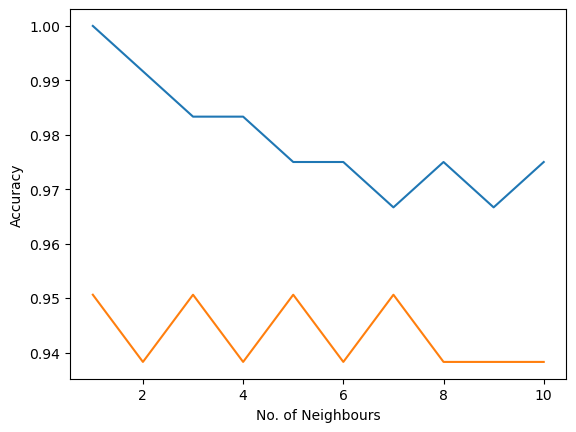

In [16]:
#
# Your code to plot neigbours vs train scores. Proivide label name as the 'train accuracy'
# Your code to plot neigbours vs test scores. Provide label bame as the 'test accuracy'.
plt.plot(neighbours, train_scores)
plt.xlabel('No. of Neighbours')
plt.plot(neighbours, test_scores)
plt.ylabel('Accuracy')

# Let's implement other ML algorithm that we studied -  Logistic Regression and MLP.

# We will do the same task using Logistic Regression and MLP.

## Implement Logistic Regression and MLP for the same problem and compare accuracy of the three classifiers using Bar plot:


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


In [17]:
#logistic regression

test_scores_models =[]
test_scores_models.append(test_scores[4])

In [18]:
logistic_Regression = LogisticRegression(random_state = 0)
logistic_Regression.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [19]:
y_pred = logistic_Regression.predict(X_train)

In [20]:
y_pred = logistic_Regression.predict(X_test)
print(y_pred)

['c_avellana' 'c_americana' 'c_americana' 'c_avellana' 'c_cornuta'
 'c_avellana' 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana'
 'c_avellana' 'c_cornuta' 'c_cornuta' 'c_avellana' 'c_americana'
 'c_americana' 'c_americana' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_cornuta' 'c_americana' 'c_cornuta' 'c_americana' 'c_cornuta'
 'c_americana' 'c_cornuta' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana' 'c_avellana'
 'c_americana' 'c_avellana' 'c_cornuta' 'c_americana' 'c_cornuta'
 'c_americana' 'c_americana' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_avellana' 'c_avellana' 'c_cornuta' 'c_cornuta' 'c_cornuta'
 'c_americana' 'c_cornuta' 'c_cornuta' 'c_americana' 'c_avellana'
 'c_cornuta' 'c_avellana' 'c_americana' 'c_cornuta' 'c_americana'
 'c_cornuta' 'c_americana' 'c_avellana' 'c_avellana' 'c_americana'
 'c_americana' 'c_cornuta' 'c_americana' 'c_avellana' 'c_avellana'
 'c_avellana' 'c_americana' 'c_avellana' 'c_avellana' 'c_avellana'
 'c_c

In [21]:
print(logistic_Regression.score(X_train, y_train))
print(logistic_Regression.score(X_test, y_test))

0.9916666666666667
0.9629629629629629


In [22]:
test_scores_models.append(logistic_Regression.score(X_test, y_test))

In [23]:
print(classification_report(y_test, y_pred))
print('Validation Accuracy: ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

 c_americana       0.93      1.00      0.96        27
  c_avellana       0.96      0.93      0.94        27
   c_cornuta       1.00      0.96      0.98        27

    accuracy                           0.96        81
   macro avg       0.96      0.96      0.96        81
weighted avg       0.96      0.96      0.96        81

Validation Accuracy:  0.9629629629629629


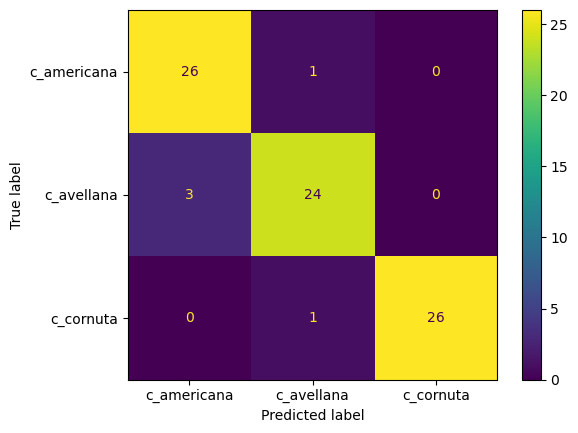

In [31]:
# Plot confusion matrix for the Logistic Regression.

cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_Regression.classes_)
disp.plot()
plt.show()

In [24]:
from sklearn.neural_network import MLPClassifier

In [25]:
MLP = MLPClassifier(random_state=1, max_iter=310, verbose=True)

In [26]:
MLP.fit(X_train, y_train)

Iteration 1, loss = 1.02496270
Iteration 2, loss = 0.98838596
Iteration 3, loss = 0.95316579
Iteration 4, loss = 0.91924717
Iteration 5, loss = 0.88664037
Iteration 6, loss = 0.85534785
Iteration 7, loss = 0.82533153
Iteration 8, loss = 0.79661407
Iteration 9, loss = 0.76913360
Iteration 10, loss = 0.74288071
Iteration 11, loss = 0.71775963
Iteration 12, loss = 0.69373720
Iteration 13, loss = 0.67082569
Iteration 14, loss = 0.64897192
Iteration 15, loss = 0.62812188
Iteration 16, loss = 0.60822535
Iteration 17, loss = 0.58920453
Iteration 18, loss = 0.57103641
Iteration 19, loss = 0.55368991
Iteration 20, loss = 0.53710653
Iteration 21, loss = 0.52126236
Iteration 22, loss = 0.50611304
Iteration 23, loss = 0.49163089
Iteration 24, loss = 0.47777981
Iteration 25, loss = 0.46453777
Iteration 26, loss = 0.45187351
Iteration 27, loss = 0.43975229
Iteration 28, loss = 0.42813956
Iteration 29, loss = 0.41701735
Iteration 30, loss = 0.40636502
Iteration 31, loss = 0.39614097
Iteration 32, los

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=310, random_state=1, verbose=True)

In [27]:
y_pred_prob = MLP.predict_proba(X_test)
print(y_pred_prob[:6])

[[3.28251806e-04 9.99199653e-01 4.72095156e-04]
 [9.80479447e-01 1.91863871e-02 3.34165701e-04]
 [4.91788080e-01 5.07714951e-01 4.96969676e-04]
 [4.00110335e-06 9.98829728e-01 1.16627063e-03]
 [1.19260810e-03 5.13997792e-03 9.93667414e-01]
 [3.24864723e-05 9.99546344e-01 4.21169352e-04]]


In [28]:
y_pred = MLP.predict(X_test)
print(y_pred)

['c_avellana' 'c_americana' 'c_avellana' 'c_avellana' 'c_cornuta'
 'c_avellana' 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana'
 'c_americana' 'c_cornuta' 'c_cornuta' 'c_avellana' 'c_americana'
 'c_americana' 'c_americana' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_cornuta' 'c_americana' 'c_cornuta' 'c_americana' 'c_cornuta'
 'c_americana' 'c_cornuta' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana' 'c_avellana'
 'c_americana' 'c_avellana' 'c_cornuta' 'c_americana' 'c_cornuta'
 'c_americana' 'c_americana' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_avellana' 'c_avellana' 'c_cornuta' 'c_cornuta' 'c_cornuta'
 'c_americana' 'c_cornuta' 'c_cornuta' 'c_americana' 'c_avellana'
 'c_cornuta' 'c_avellana' 'c_americana' 'c_cornuta' 'c_americana'
 'c_cornuta' 'c_americana' 'c_avellana' 'c_avellana' 'c_americana'
 'c_americana' 'c_cornuta' 'c_americana' 'c_avellana' 'c_avellana'
 'c_avellana' 'c_americana' 'c_avellana' 'c_avellana' 'c_avellana'
 'c_c

In [32]:
# Calculate and Print accuracy for train and test data

print (MLP.score(X_train, y_train))
print (MLP.score(X_test, y_test))

1.0
0.9382716049382716


In [33]:
test_scores_models.append(MLP.score(X_test, y_test))

In [34]:
print (classification_report(y_test, y_pred))
print("Validation Accuracy: ",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

 c_americana       0.90      0.96      0.93        27
  c_avellana       0.92      0.89      0.91        27
   c_cornuta       1.00      0.96      0.98        27

    accuracy                           0.94        81
   macro avg       0.94      0.94      0.94        81
weighted avg       0.94      0.94      0.94        81

Validation Accuracy:  0.9382716049382716


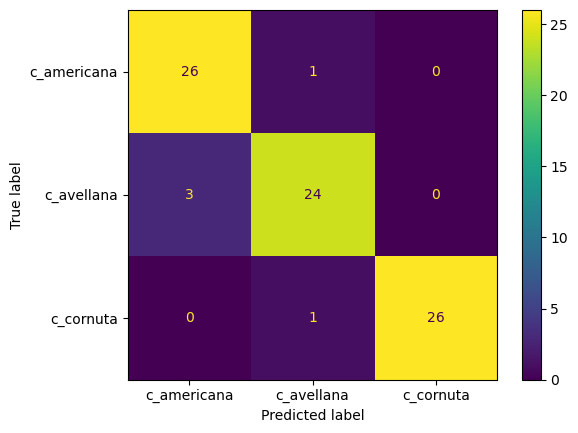

In [36]:
cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_Regression.classes_)
disp.plot()
plt.show()

In [37]:
test_scores_models

[0.9506172839506173, 0.9629629629629629, 0.9382716049382716]

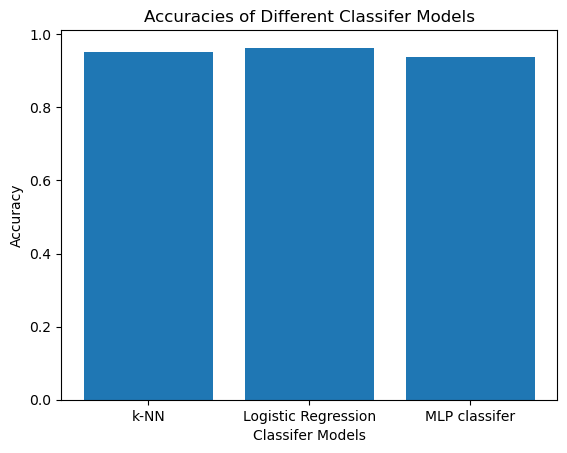

In [38]:
models=['k-NN', 'Logistic Regression' , 'MLP classifer']
plt.bar(models, test_scores_models)
plt.xlabel('Сlassifer Models')
plt.ylabel('Accuracy')
plt.title('Accuracies of Different Сlassifer Models')
plt.show()

# **Important** -  Lab logbook requirement:
# Put bar plot comparing the accracy of three models in you lablogbook.